# Neural Network

## Read and prepare data

Define selected features for model:

In [1]:
selected_features <- c('smoking',
                       'gender',
                       'age',
                       'height.cm.',
                       'weight.kg.',
                       'systolic',
                       'relaxation',
                       'fasting.blood.sugar',
                       'triglyceride',
                       'HDL',
                       'hemoglobin',
                       'serum.creatinine',
                       'ALT',
                       'Gtp',
                       'dental.caries',
                       'tartar')

Set working directory and read data:

In [2]:
setwd('/home/steinerj/Documents/ai-b/semester-4/machine-learning/ai-b-4-ml-project/data')

In [3]:
data <- read.csv("smoking.csv",header=TRUE,sep=",",fill=TRUE,stringsAsFactors=TRUE)
model.data <- data[,selected_features]

In [4]:
# Convert tartar to dummy-variable
model.data[,"tartar"] <- ifelse(data[,"tartar"] == 'Y', 1, 0)
model.data[,"tartar"] <- as.factor(model.data[,"tartar"])

# Convert categorical variables
model.data[,"smoking"] <- as.factor(model.data[,"smoking"])
model.data[,"dental.caries"] <- as.factor(model.data[,"dental.caries"])

In [5]:
summary(model.data)

 smoking   gender         age          height.cm.      weight.kg.    
 0:35237   F:20291   Min.   :20.00   Min.   :130.0   Min.   : 30.00  
 1:20455   M:35401   1st Qu.:40.00   1st Qu.:160.0   1st Qu.: 55.00  
                     Median :40.00   Median :165.0   Median : 65.00  
                     Mean   :44.18   Mean   :164.6   Mean   : 65.86  
                     3rd Qu.:55.00   3rd Qu.:170.0   3rd Qu.: 75.00  
                     Max.   :85.00   Max.   :190.0   Max.   :135.00  
    systolic       relaxation  fasting.blood.sugar  triglyceride  
 Min.   : 71.0   Min.   : 40   Min.   : 46.00      Min.   :  8.0  
 1st Qu.:112.0   1st Qu.: 70   1st Qu.: 89.00      1st Qu.: 74.0  
 Median :120.0   Median : 76   Median : 96.00      Median :108.0  
 Mean   :121.5   Mean   : 76   Mean   : 99.31      Mean   :126.7  
 3rd Qu.:130.0   3rd Qu.: 82   3rd Qu.:104.00      3rd Qu.:160.0  
 Max.   :240.0   Max.   :146   Max.   :505.00      Max.   :999.0  
      HDL           hemoglobin    serum.c

### Split dataset into training and test set

In [6]:
n <- length(model.data[,1])
index <- sample(1:n,n,replace=FALSE)
model.data <- model.data[index,]
seventyPercentLimit <- round(length(model.data[,1]) * 0.7,0)
model.data.train <- model.data[1:seventyPercentLimit,]
model.data.test <- model.data[(seventyPercentLimit+1):n,]

## Neural Network

Load library for neural network:

In [7]:
library(ANN2)

Define X and y:

In [8]:
X <- model.matrix(smoking ~ ., data=model.data.train)
X <- X[,-1]
summary(X)

    genderM            age         height.cm.      weight.kg.    
 Min.   :0.0000   Min.   :20.0   Min.   :130.0   Min.   : 30.00  
 1st Qu.:0.0000   1st Qu.:40.0   1st Qu.:160.0   1st Qu.: 55.00  
 Median :1.0000   Median :40.0   Median :165.0   Median : 65.00  
 Mean   :0.6373   Mean   :44.1   Mean   :164.7   Mean   : 65.91  
 3rd Qu.:1.0000   3rd Qu.:55.0   3rd Qu.:170.0   3rd Qu.: 75.00  
 Max.   :1.0000   Max.   :85.0   Max.   :190.0   Max.   :135.00  
    systolic       relaxation     fasting.blood.sugar  triglyceride  
 Min.   : 71.0   Min.   : 40.00   Min.   : 46.00      Min.   : 16.0  
 1st Qu.:112.0   1st Qu.: 70.00   1st Qu.: 89.00      1st Qu.: 74.0  
 Median :120.0   Median : 76.00   Median : 96.00      Median :108.0  
 Mean   :121.5   Mean   : 75.99   Mean   : 99.26      Mean   :126.8  
 3rd Qu.:130.0   3rd Qu.: 82.00   3rd Qu.:104.00      3rd Qu.:160.0  
 Max.   :240.0   Max.   :146.00   Max.   :423.00      Max.   :466.0  
      HDL           hemoglobin    serum.creatini

In [9]:
y <- model.data.train[,"smoking"]

Compute model:

In [10]:
nn_model <- neuralnetwork(X, y, hidden.layers=c(3,4,3), regression = FALSE, 
                    loss.type = "log", learn.rates = 1e-04,n.epochs = 100,
                    verbose=FALSE)

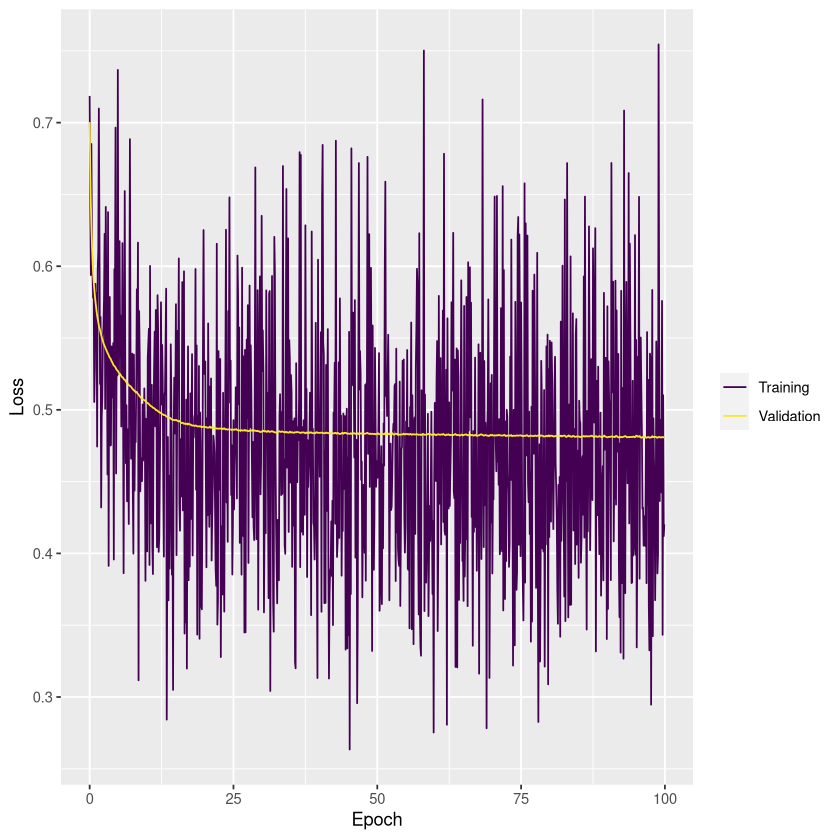

In [11]:
plot(nn_model)

Compute MAE:

In [12]:
X.test <- model.matrix(smoking ~ ., data = model.data.test)
X.test <- X.test[,-1]

In [13]:
predictions <- predict(nn_model,X.test)$predictions

In [14]:
y.test <- model.data.test[,"smoking"]

Calculate confusion matrix:

In [15]:
A <- matrix(0,ncol=2,nrow=2)

colnames(A) <- c("Real: No smoker", " Real: Smoker")
rownames(A) <- c("Prognose: No smoker", "Prognose: Smoker") 

A[1,1] <- sum(ifelse(y.test == 0 & predictions == 0, 1,0))
A[1,2] <- sum(ifelse(y.test == 1 & predictions == 0, 1,0))
A[2,1] <- sum(ifelse(y.test == 0 & predictions == 1, 1,0))
A[2,2] <- sum(ifelse(y.test == 1 & predictions == 1, 1,0))

In [20]:
A

,Real: No smoker,Real: Smoker
Prognose: No smoker,8129,1833
Prognose: Smoker,2440,4306


True-Positive-Rate und True-Negative-Rate

In [16]:
A[2,2]/(A[1,2]+A[2,2])   # True-Positive-Rate
A[1,1]/(A[1,1]+A[2,1])   # True-Negative-Rate

[1] 0.7038128

[1] 0.7766349